In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mri-and-alzheimers/oasis_cross-sectional.csv
/kaggle/input/mri-and-alzheimers/oasis_longitudinal.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/mri-and-alzheimers/oasis_cross-sectional.csv')
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [5]:
df.columns

Index(['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'Delay'],
      dtype='object')

In [6]:
# See structure and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [7]:
df.isnull().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

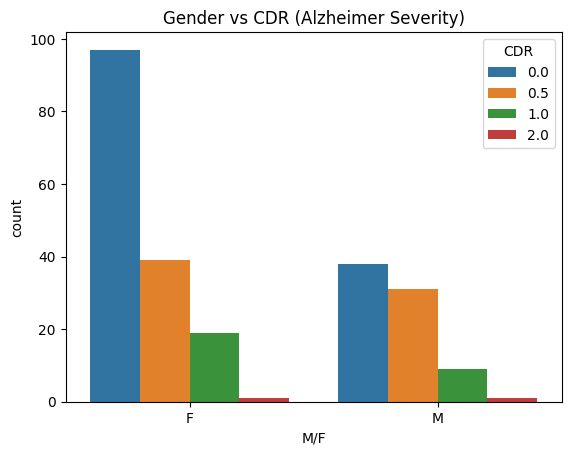

In [8]:
# Plot Gender vs Alzheimer status (CDR)
sns.countplot(data=df, x='M/F', hue='CDR')
plt.title('Gender vs CDR (Alzheimer Severity)')
plt.show()

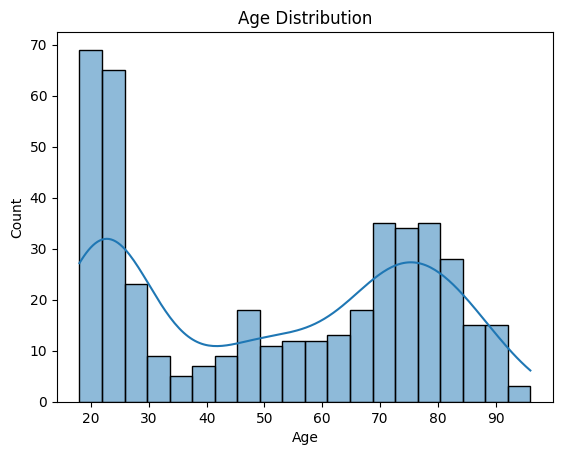

In [9]:
# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

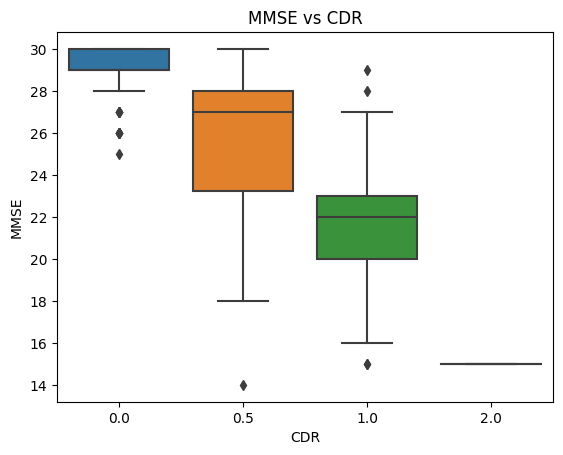

In [10]:
# MMSE score vs Alzheimer severity
sns.boxplot(data=df, x='CDR', y='MMSE')
plt.title('MMSE vs CDR')
plt.show()

In [11]:
# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert categorical columns to numbers
df['M/F'] = df['M/F'].map({'M': 0, 'F': 1})
df['Hand'] = df['Hand'].map({'R': 0, 'L': 1})

# Drop ID column
df.drop(columns=['ID'], inplace=True)

# Check cleaned data
df.head()

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,1,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,11.0
1,1,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,11.0
2,1,0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,11.0
3,0,0,28,3.0,2.0,29.0,0.0,1588,0.803,1.105,11.0
4,0,0,18,3.0,2.0,29.0,0.0,1737,0.848,1.010,11.0


In [12]:
from sklearn.model_selection import train_test_split

# Binary classification: 0.0 → Healthy, 0.5 or 1.0 → Alzheimer's
df['CDR'] = df['CDR'].apply(lambda x: 0 if x == 0 else 1)

In [13]:
X = df.drop('CDR', axis=1)
y = df['CDR']

In [14]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Predict on test data
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.71      0.71      0.71        17

    accuracy                           0.89        88
   macro avg       0.82      0.82      0.82        88
weighted avg       0.89      0.89      0.89        88



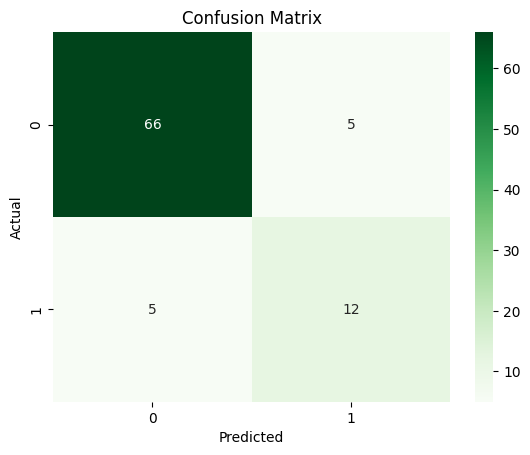

In [18]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()